# SMS Spam Classification Project

# Our Steps
#### 1. Data Cleaning
#### 2. EDA
#### 3. Data Preprocessing --vectorization,stemming,remove stop words
#### 4. Model Building
#### 5. Evaluate the model
#### 6. Test the model

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4757,spam,URGENT! Your Mobile number has been awarded wi...,NaN,NaN,NaN
4844,ham,Missing you too.pray inshah allah,NaN,NaN,NaN
2028,ham,Kallis is ready for bat in 2nd innings,NaN,NaN,NaN
252,ham,What you doing?how are you?,NaN,NaN,NaN
2135,ham,"Carlos took a while (again), we leave in a minute",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
df.sample(5)

,v1,v2
1846,ham,Its on in engalnd! But telly has decided it wo...
2775,ham,We confirm eating at esplanade?
3102,ham,"U so lousy, run already come back then half de..."
366,spam,"Update_Now - Xmas Offer! Latest Motorola, Sony..."
5059,ham,I think i am disturbing her da


In [ ]:
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)

In [ ]:
df.sample(5)

,message_type,message
1687,spam,Free Top ringtone -sub to weekly ringtone-get ...
280,ham,You got called a tool?
992,ham,Up to Ì_... ÌÏ wan come then come lor... But i...
5009,ham,"By the way, 'rencontre' is to meet again. Moun..."
1744,spam,Someone has conacted our dating service and en...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [ ]:
df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

2748    0
1012    0
4591    0
542     0
5071    1
Name: message_type, dtype: int32

In [ ]:
df[df['message_type']==1]
# there are 747 spam messages in the dataset

,message_type,message,num_characters,num_words,num_sentences,transformed_msg
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [ ]:
#now lets check the missing values
df.isnull().sum()
# there are no missing values

message_type    0
message         0
dtype: int64

In [ ]:
# now lets check for duplicated values
df.duplicated().sum()


403

*There are 403 duplicate values so we simply have to remove those values* 

In [ ]:
#remove the duplicates
df= df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

# 2. Exploratory Data Analysis

### *Lets visualize this classification problem to get a better understanding of the data*

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df['message_type'].value_counts()

0    4516
1     653
Name: message_type, dtype: int64

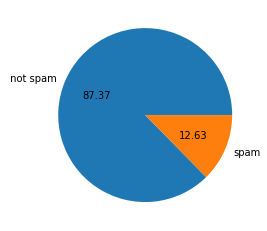

In [ ]:
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

### There is imbalance in data

# Exploring in detail

### No. of alphabets in the data
### No. of words in the data
### No. of sentences in the data

### *Now lets make 3 new columns in the data depicting the no. of characters,words and sentences*

In [ ]:
#natural language tool kit
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Devesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#find the number of alpha numeric characters in the messages column
df['num_characters']=df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#fetch number of words using NLTK
from nltk.tokenize import word_tokenize
#word tokenization
df['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [ ]:
#now find the length of each of the list to get the total number of words in each list
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,message_type,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#finding number of sentences
df['num_sentences']=df['message'].apply(lambda x: nltk.sent_tokenize(x))
df.sample(5)

,message_type,message,num_characters,num_words,num_sentences
5133,0,"Hmm... Dunno leh, mayb a bag 4 goigng out dat ...",116,29,"[Hmm... Dunno leh, mayb a bag 4 goigng out dat..."
1308,0,I jokin oni lar.. ÌÏ busy then i wun disturb Ì_.,48,13,[I jokin oni lar.. ÌÏ busy then i wun disturb ...
1772,0,Good afternoon sexy buns! How goes the job sea...,156,37,"[Good afternoon sexy buns!, How goes the job s..."
5440,0,Thank you. do you generally date the brothas?,45,10,"[Thank you., do you generally date the brothas?]"
2547,1,"Text82228>> Get more ringtones, logos and game...",101,18,"[Text82228>> Get more ringtones, logos and gam..."


In [ ]:
#finding no. of sentences
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head(5)

,message_type,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
#lets test the describe function on the new 3 columns
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


### For 'ham' messages

In [ ]:
# lets check describe() for both ham and spam individually
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


### For 'spam' messages

In [ ]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000



#### we can clearly see the spam messages are quite longer than the ham messages

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

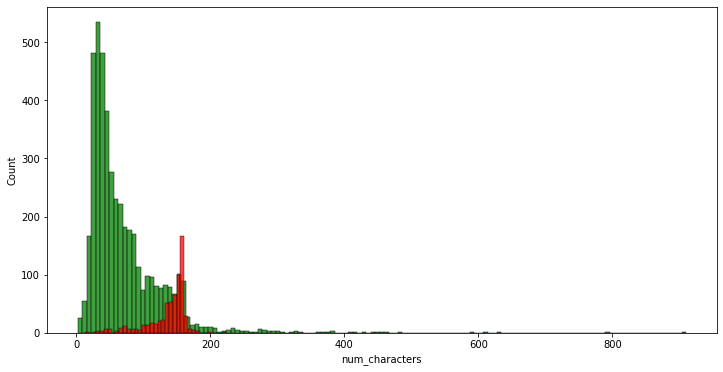

In [ ]:
#for characters
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')


<AxesSubplot:xlabel='num_words', ylabel='Count'>

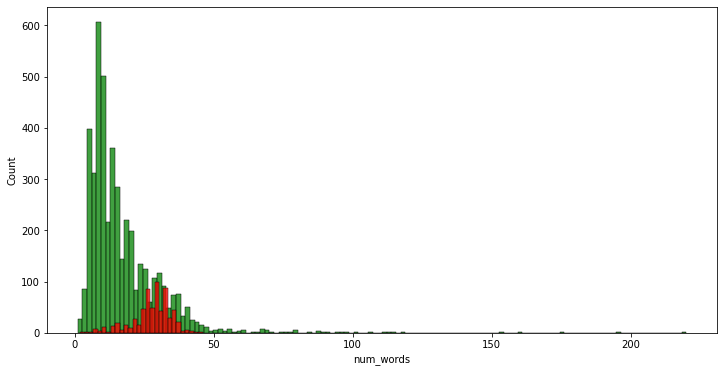

In [ ]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

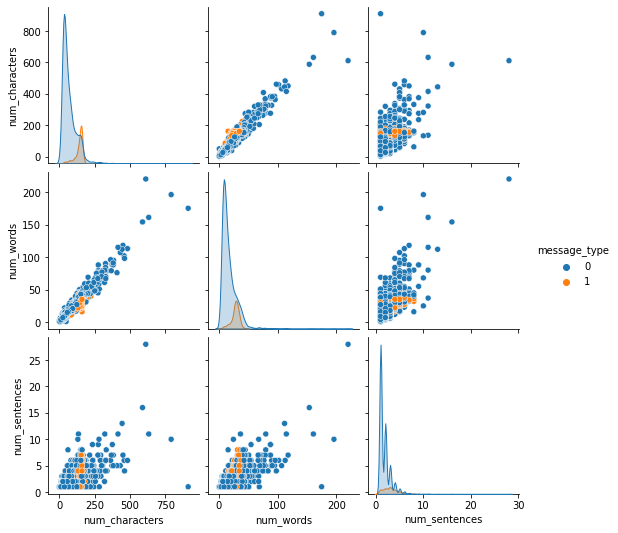

In [ ]:
#plot pairplots for ham and spam
sns.pairplot(df,hue='message_type')

# 3. Data Preprocessing

### 3.1 LowerCase
### 3.2 Tokenisation
### 3.3 Removing special characters
### 3.4 Removing stop words and punctuation
### 3.5 Stemming 

In [ ]:
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer 
ps=PorterStemmer()

def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)#tokenization  and after that text is converted to a list
    #so we run a loop in the message text
    y=[] #creating empty list to append
    for i in message:
        if i.isalnum():   #to remove special chars
            y.append(i)
    #now lets assign the y list back to the message
    #message = y   !!!!list can never be copied this way it is immutable data type so we have to do it by CLONING
    message=y[:]
    y.clear() #now y is cleared
    
    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()
    
    #now stemming function
    for i in message:
        y.append(ps.stem(i))
        
    
    #return y  --> returns as list
    return " ".join(y) #returns in the form of string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Devesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
text_transform("THis is a sms spam CLassifier playing,wasn't $3000") ##see here the special character $ is ignored , no stopwords and no punctuation

'sm spam classifi play 3000'

## Now lets apply the *text_transform* function to all the messages in the dataset

In [ ]:
df['message'].apply(text_transform)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: message, Length: 5169, dtype: object

In [ ]:
df['transformed_msg']=df['message'].apply(text_transform)

In [ ]:
df.head()

,message_type,message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### *Now we have to work basically on 2 columns the "transformed_msg" and "message_type"*

# Word Cloud

In [ ]:
#drawing a word cloud of maximum occuring words in the messages
from wordcloud import WordCloud
#create its object
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
##word cloud for SPAM
spam_wc=wc.generate(df[df['message_type']==1]['transformed_msg'].str.cat(sep=""))

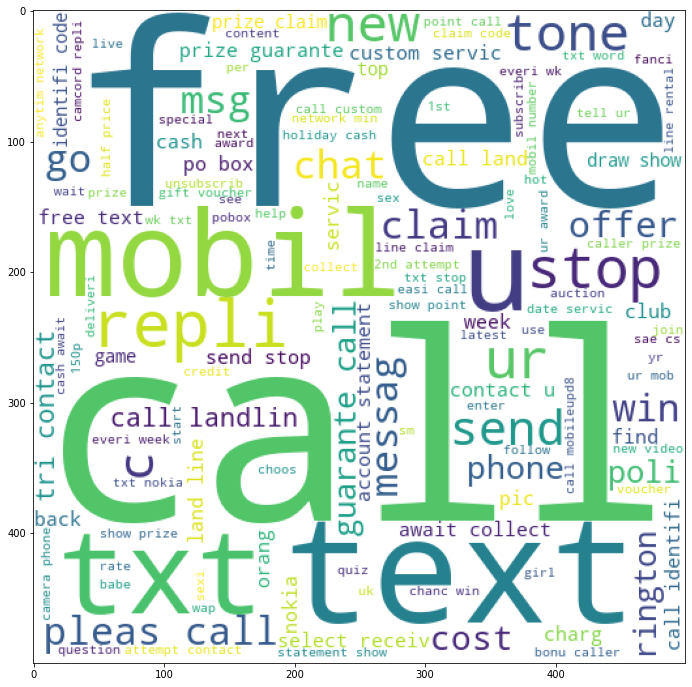

In [ ]:
#display the word cloud---SPAM
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

In [ ]:
## word cloud for ham messages
ham_wc=wc.generate(df[df['message_type']==0]['transformed_msg'].str.cat(sep=" "))

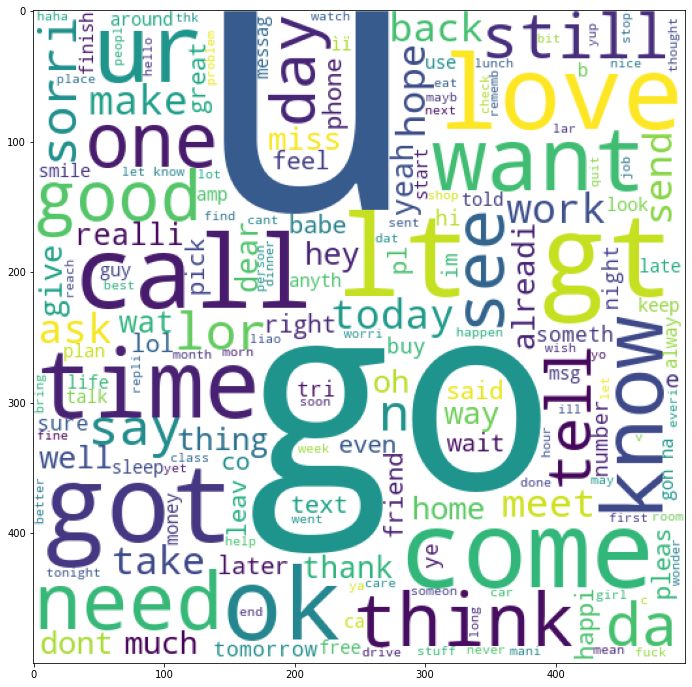

In [ ]:
#show the wordcloud for ham messages
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)


### Lets find the top 30 words used in Ham and Spam

In [ ]:
##finding the top 30 words used in Ham and spam

df[df['message_type']==1]['transformed_msg'].tolist()


['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [ ]:
##Lets print all the spam messages
spam_corpus=[]
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
       
   

In [ ]:
 len(spam_corpus)

9939

In [ ]:
## now lets find the most occuring words
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [ ]:
#Top 30 
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [ ]:
#Add those 30 words in one dataframe
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [ ]:
# Find top 30 words for HAM
ham_corpus=[]
for msg in df[df['message_type']==0]['transformed_msg']:
    for word in msg.split():
        ham_corpus.append(word)


In [ ]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129)]

# 4. Model Building

**As it is known that on Textual Data Naive Bayes Algorithm works the best hence we will use it but along the way also compare it with different algorithms**

*Input is categorical*
*Output is Numerical*

**but as we know in Naive bayes algorithm the input columns should be numerical so we have to convert(VECTORIZE) the column**

### How to vectorize:
* Bag of Words
* TFIDF
* Word2vec

## Here we will be using BAG OF WORDS

In [ ]:
##Vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
## toarray to convert from sparse array to dense array
X=cv.fit_transform(df['transformed_msg']).toarray()

In [ ]:
X.shape

(5169, 6708)

*5169 SMS 6629 words*

In [ ]:
y=df['message_type'].values

***Now we'll do TRAIN TEST SPLIT***

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))


Accuracy score of Gaussian NB is:  0.8800773694390716
Confusion Matrix of Guassian NB is:  [[792 104]
 [ 20 118]]
Precision score of the Gaussian NB is 0.5315315315315315


**we want to reduce false postives as it is a high precision model**


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))




Accuracy score of Multinomial NB is:  0.9642166344294004
Confusion Matrix of Multinomial NB is:  [[871  25]
 [ 12 126]]
Precision score of the Multinomial NB is 0.8344370860927153


In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))



Accuracy score of Bernoulli NB is:  0.9700193423597679
Confusion Matrix of Bernoulli NB is:  [[893   3]
 [ 28 110]]
Precision score of the Bernoulli NB is 0.9734513274336283


**This is an imbalanced data so precision score matters the most**

## Lets try with TFID Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf= TfidfVectorizer(max_features=3000)

### Done for Model Improvement--> Scaling

In [ ]:
X=tfidf.fit_transform(df['transformed_msg']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y=df['message_type'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))


Accuracy score of Gaussian NB is:  0.8694390715667312
Confusion Matrix of Guassian NB is:  [[788 108]
 [ 27 111]]
Precision score of the Gaussian NB is 0.5068493150684932


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))


Accuracy score of Multinomial NB is:  0.9709864603481625
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 30 108]]
Precision score of the Multinomial NB is 1.0


**Here precision is 1 which is very good as there will be no FALSE POSITIVE**

In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))


Accuracy score of Bernoulli NB is:  0.9835589941972921
Confusion Matrix of Bernoulli NB is:  [[895   1]
 [ 16 122]]
Precision score of the Bernoulli NB is 0.991869918699187


# 5. Evaluate the model

## We are chosing MNB with TFIDF

### *Lets compare other classification algorithms with MNB*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
#Creating objects of every algorithm
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
# create a dictionary of classifiers
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
import pickle
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    with open(r"someobject.pkl", "wb") as output_file:
            pickle.dump(clf, output_file)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


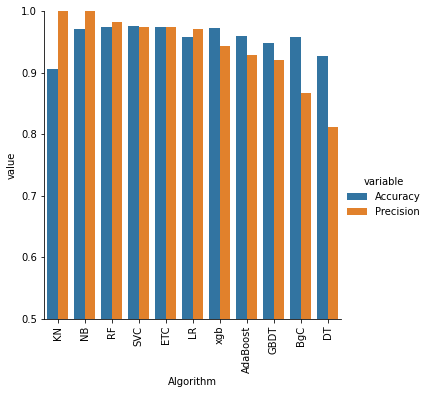

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# 4. Testing the model

In [ ]:
# import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
#wb --> write binary
pickle.dump(mnb,open('someobject.pkl','wb'))

In [ ]:
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('someobject.pkl', 'rb'))

In [ ]:
text = input()
transformed_sms = text_transform(text)
#transformed_sms
# 2 vectorize

vector_input = tfidf.transform([transformed_sms])
vector_input
# 3 predict

result = model.predict(vector_input)[0]

please click on this link you won a lottery


In [ ]:
if result==1:
    print("Spam Text")
    
else:
    print("Not Spam Text")

Not Spam Text


In [ ]:
#You’ve won a prize! Go to www.amazon.com to claim your $500 Amazon gift card.
#Surprise! You have won a 1 week FREE membership in our 100,000 Prize Jackpot! 
#Dear Devesh this is your final notice to collect your 5000 CASH award
#WINNER!! As a valued network customer you have been selected to receive 90000 prize reward!

#It was nice meeting you
# you're admitted to our college congratulations
#No worries. How are you doing?

# Conclusion
In this project we have learned how to start with cleaning and understanding data. This process needs to be done before any kind of text analysis. One should always start with cleaning the text and then move on to fetch tokens out of the text. Getting tokens out of the text also requires to exclude stop words. Also, we need to get all the other words into their base form using stemming. Then we had a look at finding out important words from the text data. We also learnt the model building and comparison of different machine learning and deep learning algorithms. In the end, we will finally build a classifier to segregate spam SMS out.